In [1]:
import warnings
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.tseries.offsets import DateOffset
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")


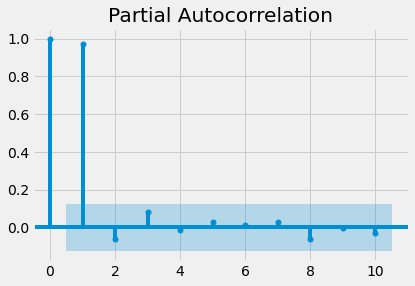

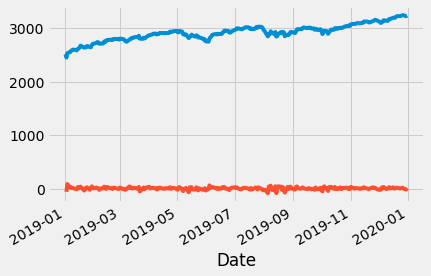

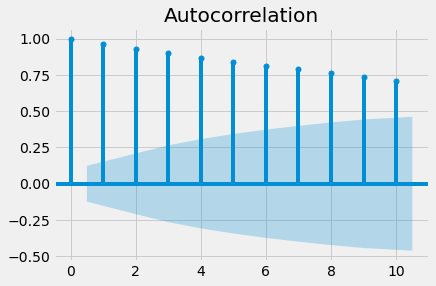

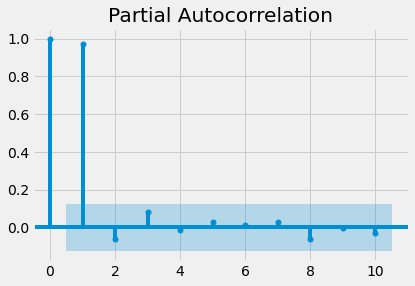

In [2]:
daily_data = pd.read_excel('SP500.xls')
df= daily_data.set_index('Date')
data=df["SP500"]
data = data.dropna()
data.plot()
dif_data=data.diff()
dif_data.plot()
plot_acf(data,lags=10) #correlation function
plot_pacf(data,lags=10) #partial correlation function

                               SARIMAX Results                                
Dep. Variable:                  SP500   No. Observations:                  247
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1116.469
Date:                Sat, 13 Feb 2021   AIC                           2234.939
Time:                        15:18:44   BIC                           2238.444
Sample:                             0   HQIC                          2236.350
                                - 247                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       512.4092     31.600     16.216      0.000     450.475     574.344
Ljung-Box (L1) (Q):                   1.61   Jarque-Bera (JB):                98.77
Prob(Q):                              0.20   Pr

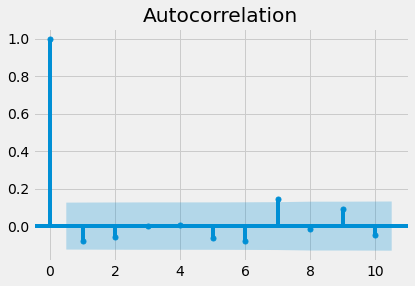

In [3]:
#TEST AND TRAIN

test_size=5 
train_size=len(data)-test_size 
train=data[0 : train_size]
test=data[train_size:len(data)]

#AR(0) model

mod0=sm.tsa.statespace.SARIMAX(train,trend='n',order=(0,1,0),seasonal_order=(0,0,0,0),enforce_stationarity=True, enforce_invertibility=True)
results0=mod0.fit(disp=False)
print(results0.summary())
#A lower AIC or BIC value indicates a better fit so we should decrease
modAR0_aic=results0.aic
modAR0_bic=results0.bic
residuals0 = results0.resid
residuals0 = residuals0.iloc[1:-1]
plot_acf(residuals0, lags=10)

pred0=results0.get_prediction(start=pd.to_datetime('2019-01-10'),end=pd.to_datetime('2019-12-10'), dynamic=True)
pred_pseudo0=pred0.predicted_mean
fitted_values0=results0.fittedvalues


                               SARIMAX Results                                
Dep. Variable:                  SP500   No. Observations:                  247
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -1115.986
Date:                Sat, 13 Feb 2021   AIC                           2235.973
Time:                        15:18:44   BIC                           2242.984
Sample:                             0   HQIC                          2238.796
                                - 247                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0634      0.054     -1.174      0.241      -0.169       0.043
sigma2       510.4322     32.849     15.539      0.000     446.048     574.816
Ljung-Box (L1) (Q):                   0.11   Jarque-

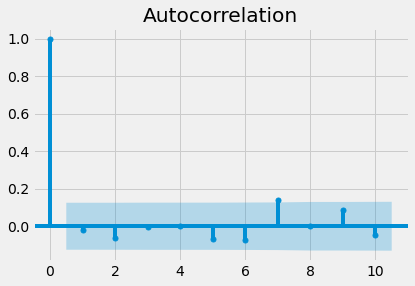

In [4]:
#AR(1) model

mod1=sm.tsa.statespace.SARIMAX(train,trend='n',order=(1,1,0),seasonal_order=(0,0,0,0),enforce_stationarity=True, enforce_invertibility=True)

results1=mod1.fit(disp=False)
print(results1.summary())
modAR1_aic=results1.aic
modAR1_bic=results1.bic
#AIC   2235.973
#BIC   2242.984
residuals1 = results1.resid
residuals1 = residuals1.iloc[1:-1]
plot_acf(residuals1, lags=10)

pred1=results1.get_prediction(start=pd.to_datetime('2019-01-10'),end=pd.to_datetime('2019-12-10'), dynamic=True)
pred_pseudo1=pred1.predicted_mean
fitted_values1=results1.fittedvalues


                               SARIMAX Results                                
Dep. Variable:                  SP500   No. Observations:                  247
Model:               SARIMAX(2, 1, 0)   Log Likelihood               -1115.755
Date:                Sat, 13 Feb 2021   AIC                           2237.510
Time:                        15:18:45   BIC                           2248.026
Sample:                             0   HQIC                          2241.745
                                - 247                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0644      0.055     -1.168      0.243      -0.172       0.044
ar.L2         -0.0451      0.056     -0.802      0.423      -0.155       0.065
sigma2       509.4312     32.754     15.553      0.0

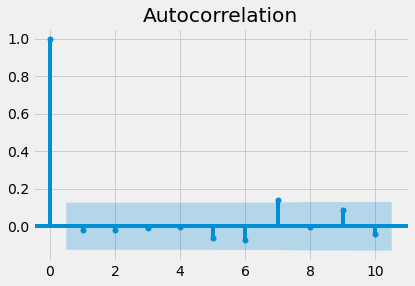

In [5]:
#AR(2) Model

mod2=sm.tsa.statespace.SARIMAX(train,trend='n',order=(2,1,0),seasonal_order=(0,0,0,0),enforce_stationarity=True, enforce_invertibility=True)
results2=mod2.fit(disp=False)
print(results2.summary())
modAR2_aic=results2.aic
modAR2_bic=results2.bic
#AIC 2237.510
#BIC 2248.026
residuals2 = results2.resid
residuals2 = residuals2.iloc[1:-1]
plot_acf(residuals2, lags=10)
pred2=results2.get_prediction(start=pd.to_datetime('2019-01-10'),end=pd.to_datetime('2019-12-10'), dynamic=True)
pred_pseudo2=pred2.predicted_mean
mape2=100*(abs(test-pred_pseudo2)/test).mean()
fitted_values2=results2.fittedvalues

                               SARIMAX Results                                
Dep. Variable:                  SP500   No. Observations:                  247
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1115.945
Date:                Sat, 13 Feb 2021   AIC                           2235.890
Time:                        15:18:45   BIC                           2242.901
Sample:                             0   HQIC                          2238.713
                                - 247                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0686      0.055     -1.255      0.209      -0.176       0.039
sigma2       510.2551     32.721     15.594      0.000     446.122     574.388
Ljung-Box (L1) (Q):                   0.07   Jarque-

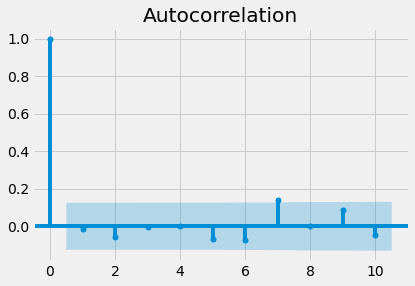

In [6]:
#MA(0) Model 

mod3=sm.tsa.statespace.SARIMAX(train,trend='n',order=(0,1,1),seasonal_order=(0,0,0,0),enforce_stationarity=True, enforce_invertibility=True)
results3=mod3.fit(disp=False)
print(results3.summary())
modMA1_aic=results3.aic
modMA1_bic=results3.bic
#AIC=  2235.890
#BIC=  2242.901
residuals3 = results3.resid
residuals3 = residuals3.iloc[1:-1]
plot_acf(residuals3, lags=10)
pred3=results3.get_prediction(start=pd.to_datetime('2019-01-10'),end=pd.to_datetime('2019-12-10'), dynamic=True)

pred_pseudo3=pred3.predicted_mean
mape3=100*(abs(test-pred_pseudo3)/test).mean()
fitted_values3=results3.fittedvalues

                               SARIMAX Results                                
Dep. Variable:                  SP500   No. Observations:                  247
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -1115.780
Date:                Sat, 13 Feb 2021   AIC                           2237.560
Time:                        15:18:45   BIC                           2248.076
Sample:                             0   HQIC                          2241.795
                                - 247                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0633      0.055     -1.146      0.252      -0.172       0.045
ma.L2         -0.0379      0.057     -0.666      0.506      -0.150       0.074
sigma2       509.5271     32.687     15.588      0.0

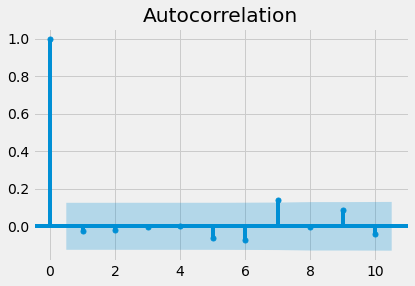

In [7]:
#MA(1) Model 

mod4=sm.tsa.statespace.SARIMAX(train,trend='n',order=(0,1,2),seasonal_order=(0,0,0,0),enforce_stationarity=True, enforce_invertibility=True)
results4=mod4.fit(disp=False)
print(results4.summary())
modMA2_aic=results4.aic
modMA2_bic=results4.bic
#AIC=  2237.560
#BIC=  2248.076
residuals4 = results4.resid
residuals4 = residuals4.iloc[1:-1]
plot_acf(residuals4, lags=10)
pred4=results4.get_prediction(start=pd.to_datetime('2019-01-10'),end=pd.to_datetime('2019-12-10'), dynamic=True)

pred_pseudo4=pred4.predicted_mean
mape4=100*(abs(test-pred_pseudo4)/test).mean()
fitted_values4=results4.fittedvalues

                               SARIMAX Results                                
Dep. Variable:                  SP500   No. Observations:                  247
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1115.845
Date:                Sat, 13 Feb 2021   AIC                           2237.690
Time:                        15:18:46   BIC                           2248.206
Sample:                             0   HQIC                          2241.924
                                - 247                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3144      0.713      0.441      0.659      -1.084       1.712
ma.L1         -0.3822      0.697     -0.549      0.583      -1.747       0.983
sigma2       509.8128     32.835     15.526      0.0

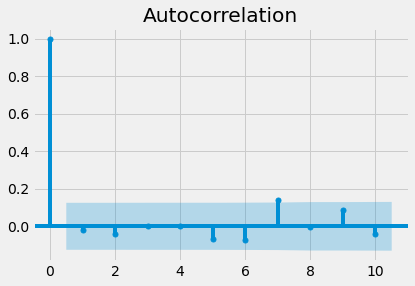

In [8]:
# ARMA(1,1)

mod5=sm.tsa.statespace.SARIMAX(train,trend='n',order=(1,1,1),seasonal_order=(0,0,0,0),enforce_stationarity=True, enforce_invertibility=True)
results5=mod5.fit(disp=False)
print(results5.summary())
modARMA1_aic=results5.aic
modARMA1_bic=results5.bic
#AIC=  2237.690
#BIC=  2248.206

residuals5 = results5.resid
residuals5 = residuals5.iloc[1:-1]
plot_acf(residuals5, lags=10)
# if residuals lie between the confidence interval then the model is good to use
pred5=results5.get_prediction(start=pd.to_datetime('2019-01-10'),end=pd.to_datetime('2019-12-10'), dynamic=True)

pred_pseudo5=pred5.predicted_mean


mape5=100*(abs(test-pred_pseudo5)/test).mean()


fitted_values5=results5.fittedvalues

                               SARIMAX Results                                
Dep. Variable:                  SP500   No. Observations:                  247
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1115.747
Date:                Sat, 13 Feb 2021   AIC                           2239.494
Time:                        15:18:46   BIC                           2253.516
Sample:                             0   HQIC                          2245.140
                                - 247                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1799      1.119     -0.161      0.872      -2.374       2.014
ar.L2         -0.0528      0.080     -0.662      0.508      -0.209       0.104
ma.L1          0.1157      1.127      0.103      0.9

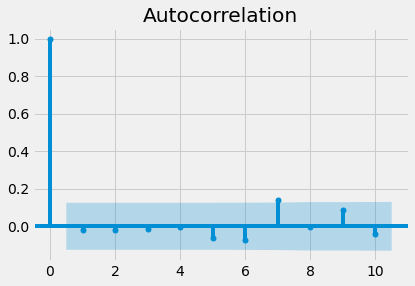

In [9]:
#ARMA(2,1)

mod6=sm.tsa.statespace.SARIMAX(train,trend='n',order=(2,1,1),seasonal_order=(0,0,0,0),enforce_stationarity=True, enforce_invertibility=True)
results6=mod6.fit(disp=False)
print(results6.summary())
modARMA2_aic=results6.aic
modARMA2_bic=results6.bic

#AIC= 2239.494
#BIC= 2253.516

residuals6 = results6.resid
residuals6 = residuals6.iloc[1:-1]
plot_acf(residuals6, lags=10)

# if residuals lie between the confidence interval then the model is good to use
pred6=results6.get_prediction(start=pd.to_datetime('2019-01-10'),end=pd.to_datetime('2019-12-10'), dynamic=True)
pred_pseudo6=pred6.predicted_mean
mape6=100*(abs(test-pred_pseudo6)/test).mean()
fitted_values6=results6.fittedvalues

In [15]:
#Rolling AR(0)
daily_data1 = pd.read_excel('SP500.xls')
data1=daily_data1["SP500"]
data1=pd.DataFrame(data1)
test_size=5 
train_size=len(data1)-test_size 
test1=data1[train_size:len(data1)]
test1=test1.reset_index(drop=True)
test1=data1[train_size:len(data1)]
test1=test1.reset_index() 
del test1['index']
ts = test_size
matpredall0=np.zeros((ts,1)) 
matrix0 = np.zeros((1,1)) 
for j in range(ts): 
   
    train=data1[0+j:train_size+j] 
    test=test1[0+j:1+j] 
    m=0 
    model=sm.tsa.statespace.SARIMAX(train,trend='c',order=(0,1,0)) #AR(0) model
    results=model.fit(disp=False) 
    pred_ARIMA =results.get_prediction(start=train_size,end=train_size, dynamic=True) # One step ahead prediction
    pred_pseudo=pred_ARIMA.predicted_mean # 1 day after predicted value
    pred_pseudo=pred_pseudo.reset_index() #reseting index
    del pred_pseudo['index']
    pred_pseudo.columns = ['predicted'] #renaming
    predict0=pred_pseudo.values 

    matrix0[:,m] = predict0 
    matpredall0[j,0]=matrix0 
dfmatpredict0=pd.DataFrame(matpredall0) 
dfmatpredict0.columns = ['predicted']

mape7=100*(abs(test1.values-dfmatpredict0)/test1.values).mean()

In [16]:
mape7

predicted    0.327294
dtype: float64

In [18]:
# Rolling AR(1)

matpredall2=np.zeros((ts,1)) 
matrix2 = np.zeros((1,1))
for j in range(ts):
    
    train2=data1[0+j:train_size+j]
    test2=test1[0+j:1+j] 
    m=0 
    model2=sm.tsa.statespace.SARIMAX(train2,trend='c',order=(1,1,0)) #AR(1) model
    results2=model2.fit(disp=False)
    pred_ARIMA2 =results2.get_prediction(start=train_size,end=train_size, dynamic=True)
    pred_pseudo2=pred_ARIMA2.predicted_mean
    pred_pseudo2=pred_pseudo2.reset_index()
    del pred_pseudo2['index']
    pred_pseudo2.columns = ['predicted'] #renaming column
    predict2=pred_pseudo2.values
    matrix2[:,m] = predict2 
    matpredall2[j,0]=matrix2
dfmatpredict2=pd.DataFrame(matpredall2) 
dfmatpredict2.columns = ['predicted']
mape8=100*(abs(test1.values-dfmatpredict2)/test1.values).mean()


In [19]:
mape8


predicted    0.314303
dtype: float64

In [22]:
# Rolling AR(2)

matpredall3=np.zeros((ts,1)) 
matrix3 = np.zeros((1,1)) 
for j in range(ts): 
    
    train3=data1[0+j:train_size+j] 
    test3=test1[0+j:1+j] 
    m=0 
    model3=sm.tsa.statespace.SARIMAX(train3,trend='c',order=(2,1,0)) #AR(2) model
    results3=model3.fit(disp=False) 
    pred_ARIMA3 =results3.get_prediction(start=train_size,end=train_size, dynamic=True) # One step ahead prediction
    pred_pseudo3=pred_ARIMA3.predicted_mean # 1 day after predicted value
    pred_pseudo3=pred_pseudo3.reset_index() #reseting index
    del pred_pseudo3['index']
    pred_pseudo3.columns = ['predicted'] #renaming column
    predict3=pred_pseudo3.values
    matrix3[:,m] = predict3 
    matpredall3[j,0]=matrix3 
dfmatpredict3=pd.DataFrame(matpredall3) 
dfmatpredict3.columns = ['predicted']

mape9=100*(abs(test1.values-dfmatpredict3)/test1.values).mean()


In [23]:
mape9

predicted    0.305463
dtype: float64

In [25]:
# Rolling MA(1)

matpredall4=np.zeros((ts,1)) 
matrix4 = np.zeros((1,1)) 

for j in range(ts):
    
    train4=data1[0+j:train_size+j] 
    test4=test1[0+j:1+j] 
    m=0 
    model4=sm.tsa.statespace.SARIMAX(train4,trend='c',order=(0,1,1)) #MA(1) model
    results4=model4.fit(disp=False) 
    pred_ARIMA4 =results4.get_prediction(start=train_size,end=train_size, dynamic=True) # One step ahead prediction
    pred_pseudo4=pred_ARIMA4.predicted_mean # 1 day after predicted value
    pred_pseudo4=pred_pseudo4.reset_index() #reseting index
    del pred_pseudo4['index']
    pred_pseudo4.columns = ['predicted'] #renaming column
    predict4=pred_pseudo4.values 

    matrix4[:,m] = predict4 
    matpredall4[j,0]=matrix4  
dfmatpredict4=pd.DataFrame(matpredall4) 
dfmatpredict4.columns = ['predicted']

mape10=100*(abs(test1.values-dfmatpredict4)/test1.values).mean()


In [26]:
mape10

predicted    0.311822
dtype: float64

In [27]:
# Rolling MA(2)

matpredall5=np.zeros((ts,1)) 
matrix5 = np.zeros((1,1))
for j in range(ts): 
    
    train5=data1[0+j:train_size+j] 
    test5=test1[0+j:1+j] 
    m=0 
    model5=sm.tsa.statespace.SARIMAX(train5,trend='c',order=(0,1,2)) #MA(2) model
    results5=model5.fit(disp=False) 
    pred_ARIMA5 =results5.get_prediction(start=train_size,end=train_size, dynamic=True) # One step ahead prediction
    pred_pseudo5=pred_ARIMA5.predicted_mean # 1 day after predicted value
    pred_pseudo5=pred_pseudo5.reset_index() #reseting index
    del pred_pseudo5['index']
    pred_pseudo5.columns = ['predicted'] #renaming column
    predict5=pred_pseudo5.values
    matrix5[:,m] = predict5 
    matpredall5[j,0]=matrix5  
dfmatpredict5=pd.DataFrame(matpredall5) 
dfmatpredict5.columns = ['predicted']
mape11=100*(abs(test1.values-dfmatpredict5)/test1.values).mean()
 

In [28]:
mape11

predicted    0.306818
dtype: float64

In [29]:
# Rolling ARMA(1,1)

matpredall6=np.zeros((ts,1)) 
matrix6 = np.zeros((1,1)) 
for j in range(ts): 
    
    train6=data1[0+j:train_size+j] 
    test6=test1[0+j:1+j] 
    m=0 
    model6=sm.tsa.statespace.SARIMAX(train6,trend='c',order=(1,1,1)) #ARMA(1,1) model
    results6=model6.fit(disp=False) 
    pred_ARIMA6 =results6.get_prediction(start=train_size,end=train_size, dynamic=True) # One step ahead prediction
    pred_pseudo6=pred_ARIMA6.predicted_mean # 1 day after predicted value
    pred_pseudo6=pred_pseudo6.reset_index() #reseting index
    del pred_pseudo6['index']
    pred_pseudo6.columns = ['predicted'] #renaming column
    predict6=pred_pseudo6.values
    matrix6[:,m] = predict6 
    matpredall6[j,0]=matrix6
dfmatpredict6=pd.DataFrame(matpredall6) 
dfmatpredict6.columns = ['predicted']
mape12=100*(abs(test1.values-dfmatpredict6)/test1.values).mean()
 


In [30]:
mape12

predicted    0.313609
dtype: float64

In [31]:
# Rolling ARMA(2,1)

matpredall7=np.zeros((ts,1)) 
matrix7 = np.zeros((1,1))
for j in range(ts): 
    
    train7=data1[0+j:train_size+j] 
    test7=test1[0+j:1+j] 
    m=0 
    model7=sm.tsa.statespace.SARIMAX(train7,trend='c',order=(2,1,1)) #ARMA(2,1) model
    results7=model7.fit(disp=False) 
    pred_ARIMA7 =results7.get_prediction(start=train_size,end=train_size, dynamic=True) # One step ahead prediction
    pred_pseudo7=pred_ARIMA7.predicted_mean # 1 day after predicted value
    pred_pseudo7=pred_pseudo7.reset_index() #reseting index
    del pred_pseudo7['index']
    pred_pseudo7.columns = ['predicted'] #renaming column
    predict7=pred_pseudo7.values
    matrix7[:,m] = predict7 
    matpredall7[j,0]=matrix7 
dfmatpredict7=pd.DataFrame(matpredall7) 
dfmatpredict7.columns = ['predicted']
mape13=100*(abs(test1.values-dfmatpredict7)/test1.values).mean()


In [32]:
mape13

predicted    0.301847
dtype: float64

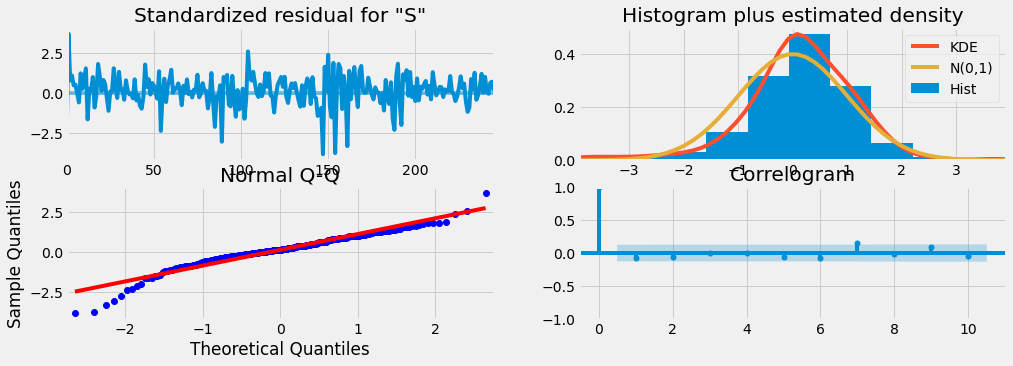

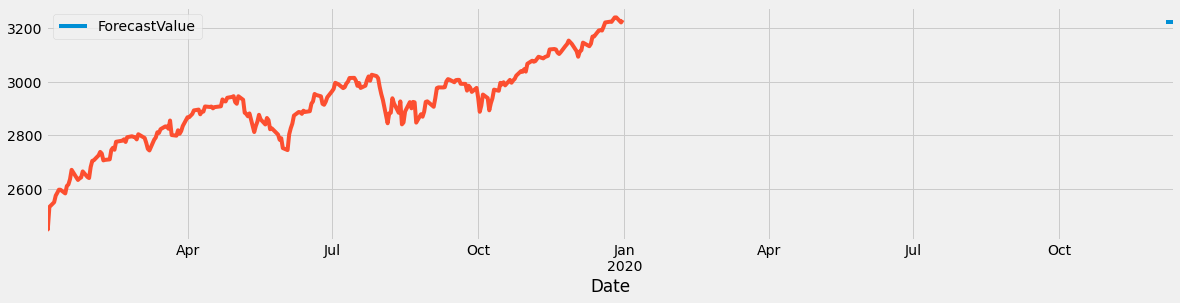

In [45]:
#Rolling AR(1) is the best model because mabe8 is lowest than others

#Let's check the diagnostics and be sure that residuals are uncorrelated and normally distributed with zero mean. 
results0.plot_diagnostics(figsize=(15,5))
plt.show

#real prediction / out of sample predictions 
tpred_real=results0.get_prediction(start=len(data),end=len(data)+5, dynamic=True,)
pred_ci=tpred_real.conf_int() ## confidence interval
pred_real=tpred_real.predicted_mean## gives the mean of the forecasted values

SARIMAX_forecast = round(results0.forecast(steps =8 ), 2)
idx = pd.date_range('2020-12-07', '2020-12-12', freq='D')
SARIMAX_forecast = pd.DataFrame(list(zip(list(idx),list(SARIMAX_forecast))), 
                                columns=['Date','ForecastValue']).set_index('Date')
SARIMAX_forecast .plot()

### plotting observed and forecast values

ax = data.plot(label='observed', figsize=(18, 4))

plt.plot(tpred_real.conf_int(),pred_real)
pred_real.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('SP500Daily ')
plt.legend()
plt.show()
mapes = (mape2, mape3, mape4)